# Introduction Scikit-Learn

## Data Representation in Scikit-Learn

### Data as table

Let's considier the Iris dataset

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

/home/tomperr/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Features matrix

Often stored in a variable `X`. 2D array shaped `[n_samples, n_features]`, most often contained in NumPy array of Pandas DataFrame

#### Target Array

`y` variable by convention, one dimensional array of length `n_samples` to store labels.
This is what we want to predict. In statistical terms, it is the dependent variable.

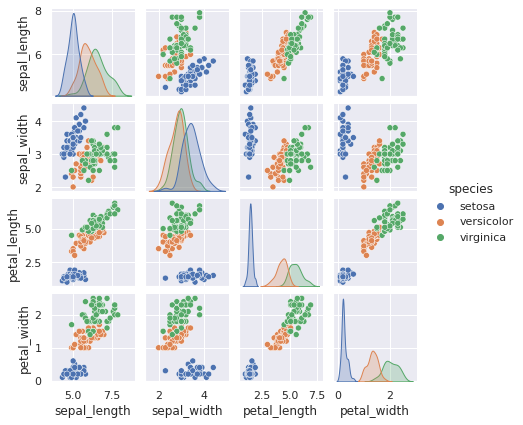

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

Let's extract the feature matrix and the target array

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

## Scikit-Learn's Estimator API

[Scikit-Leanr API paper](http://arxiv.org/abs/1309.0238)
- Consistency: all objets share a common interface
- Inspection: everything exposed
- Limited object hierarchy: only algorithms are represented by Python classes
- Composition: tasks can be expressed as sequences of fundamental algorithms
- Sensible defaults: default values when needed

### Basics of the API

Steps to use estimator API:
- choose a class of model
- choose model hyperparameters
- arange data into features matrix and target vector
- fit the model
- predict labels

### Supervised learning example: Simple linear regression

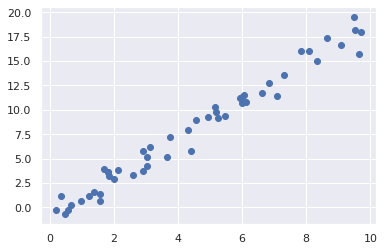

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [14]:
from sklearn.linear_model import LinearRegression # choose model
model = LinearRegression(fit_intercept=True) # hyperparameters
# arrange data 
X = x[:, np.newaxis]
X.shape

(50, 1)

In [15]:
model.fit(X, y); # fit the model

In [16]:
# see params of the LinearRegression
model.coef_

array([1.9776566])

In [18]:
model.intercept_

-0.9033107255311164

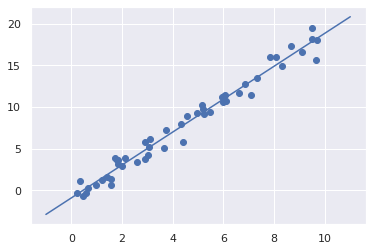

In [19]:
# predict label
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

### Supervised learning example: Iris classification

Let's use Naive Bayes Classification

In [21]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [22]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality

Let's reduce the number of dimensions using PCA (Principal Component Analysis)

In [24]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

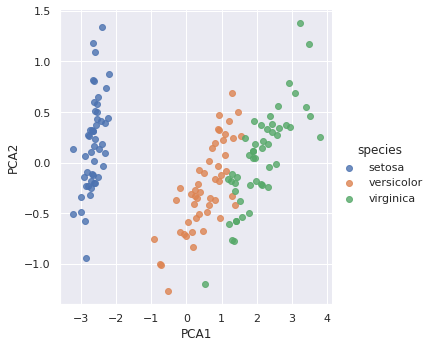

In [26]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

### Unsupervised learning: Iris Clustering

Let's use Guassian mixture model (GMM)

In [30]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

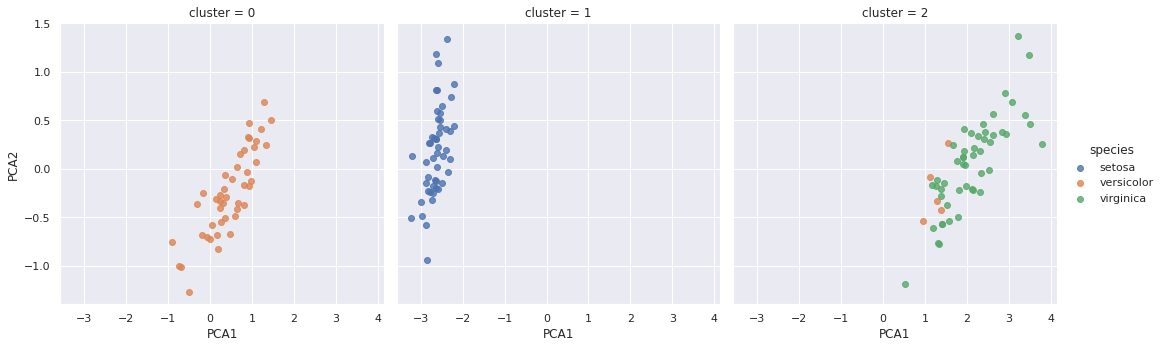

In [33]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

## Application: Exploring Hand-written Digits

### Loading and visualizing the digits data

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

Let's the the first hundred of these

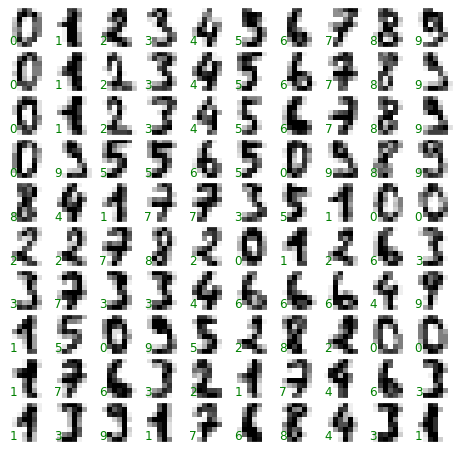

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

We can treat each pixel as a feature

In [36]:
X = digits.data
X.shape

(1797, 64)

In [38]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

Let's use Isomap (Manifold Learning)

In [44]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2, n_neighbors=10)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

/tmp/ipykernel_36877/1180578293.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='digit label')


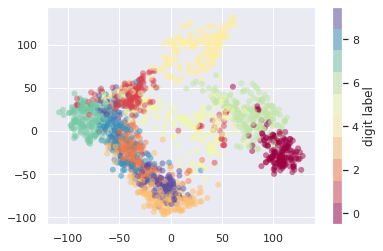

In [53]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label')
plt.clim(-0.5, 9.5);

### Classification onf digits

In [54]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [55]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Print the accuracy

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Let's see the confusion matrix

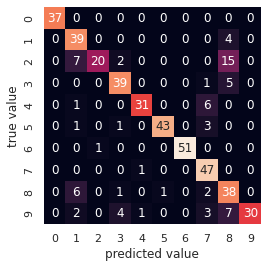

In [57]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Use text color to see good and bad prediction

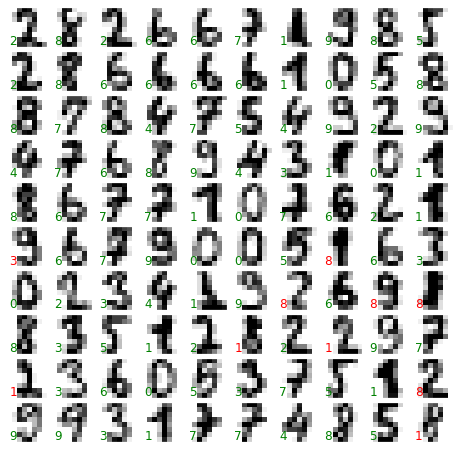

In [58]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')